<h1>Содержание<span class="toc-item"></span></h1>
</li><li><span><a href="#Изучение данных з файла" data-toc-modified-id="Изучение данных из файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li></ul></div><li><span><a <span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="Исследовательский анализ данных" data-toc-modified-id="Исследовательский анализ данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка гипотез" data-toc-modified-id="Проверка гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Определение перспективного тарифа для телеком-компании

Для проведения исследовательского анализа обратились менеджеры компании «Мегалайна». Компания предлагает клиентамт два тарифных плана: «Смарт» и «Ультра». Сотрудники коммерческого отдела, какой из предложенных тарифов более выгодный для клиентов, чотбы выстроить верную рекламную концепцию и заложить соответсвующий бюджет. Сотрудники предоставили данные на 500 пользователей «Мегалайна» за 2018 год (основная информация - из какого они города, к каому тарифному плану подключены, сколько звонков и сообщений совершуают за меясц). Необходимо сделать вывод, какой тариф выгодней.

# Описание тарифов

# Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

# Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файла

In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # прочитала первый файл /datasets/calls.csv методом info получена общая информация о таблице
display(calls.head(10))
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.duplicated().sum() # проверка дубликатов в таблице calls

0

# Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

# Выявленные ошибки в таблице calls

- неверный формат данных даты в столбце call_date
- значения в столбце duration представлены в формате float64, необходимо округлить и изменить формат на integer, так как «Мегалайн» всегда округляет секунды до минут
- в таблице 202607 строк, пропусков нет

In [4]:
internet = pd.read_csv('/datasets/internet.csv') # прочитала второй файл /datasets/internet.csv методом info получена общая информация о таблице
display(internet.head(10))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
internet.duplicated().sum() # проверка дубликатов в таблице internet

0

# Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

# Выявленные ошибки в таблице internet 

- в таблице заадублирован столбец нумерации Unnamed:0 - его необходимо удалить
- объём потраченного за сессию интернет-трафика представлен в мегабайтах, необходимо перевести в гигабайти и окгрулить в большую сторону по условиям тарифа
- в столбце session_date неверный формат даты
- в таблице 149396 строк, пропусков не выявлено

In [6]:
messages = pd.read_csv('/datasets/messages.csv')  # прочитала третий файл /datasets/messages.csv методом info получена общая информация о таблице
display(messages.head(10))
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages.duplicated().sum() # проверка дубликатов в таблице messages

0

# Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

# Выявленные ошибки в таблице messages:

- в столбце message_date неверный формат даты
- в таблице 123036 строк, пропусков не выявлено

In [8]:
tariffs = pd.read_csv('/datasets/tariffs.csv') # прочитала четвергый файл /datasets/tariffs.csv методом info получена общая информация о таблице
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
tariffs.duplicated().sum() # проверка дубликатов в таблице tariffs

0

# Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
users = pd.read_csv('/datasets/users.csv') # прочитала gznsq файл /datasets/users.csv методом info получена общая информация о таблице
display(users.head(10))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.duplicated().sum() # проверка дубликатов в таблице users

0

# Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

# Выявленные ошибки в таблице users:

- в столбцах reg_date и churn_date указан неверный формат данных
- в таблице 500 строк, в столбце churn_date выявлены пропуски, но если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому эти пропуски не повлияют на дальнейший расчёт

## Предобработка данных

In [12]:
# предобработка данных в таблице calls

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # изменен формат даты в столбце call_date
calls['month'] = pd.DatetimeIndex(calls['call_date']).month # добавлен новый столбец month
calls['duration'] = calls['duration'].apply(np.ceil).replace(0, 1) # значения столбца duration округлены в большую сторону
calls['duration'] = calls['duration'].astype(int) #изменен формат данных в столбце duration

# проверяем полученные данные

display(calls.head())
calls.info()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


In [13]:
# предобработка данных в таблице internet

internet = internet.drop('Unnamed: 0', 1) # удален столбец Unnamed: 0
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # изменен формат даты в столбце session_date
internet['month'] = pd.DatetimeIndex(internet['session_date']).month # добавлен новый столбец month
internet['mb_used'] = internet['mb_used'].astype(int) #изменен формат данных в столбце mb_used

# проверяем полученные данные

display(internet.head())
internet.info()

,id,mb_used,session_date,user_id,month
0,1000_0,112,2018-11-25,1000,11
1,1000_1,1052,2018-09-07,1000,9
2,1000_2,1197,2018-06-25,1000,6
3,1000_3,550,2018-08-22,1000,8
4,1000_4,302,2018-09-24,1000,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [14]:
# предобработка данных в таблице messages

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # изменен формат даты в столбце message_date
messages['month'] = pd.DatetimeIndex(messages['message_date']).month # добавлен новый столбец month

# проверяем полученные данные

display(messages.head())
internet.info()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [15]:
# предобработка данных в таблице в таблице users:

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') # изменен формат даты в столбце reg_date

# проверяем полученные данные

display(users.head())
internet.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [16]:
# созданы сводные таблицы из таблиц calls, message, internet

calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
#print(calls_month)
calls_month.reset_index()
calls_month.columns = ['calls_duration', 'calls_amount']
#print(calls_month)

In [17]:
message_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
#print(message_month)
message_month.reset_index()
message_month.columns = ['messege_count']
#print(message_month)

In [18]:
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
#print(internet_month)
internet_month.reset_index()
internet_month.columns = ['internet_count']
#print(internet_month)

In [19]:
# методом merge объединены таблицы calls_month, message_month и internet_month

total_data = calls_month.merge(message_month, on=['user_id', 'month'], how='outer')
total_data = total_data.merge(internet_month, on=['user_id', 'month'], how='outer')
total_data = total_data.reset_index()
display(total_data.head())

,user_id,month,calls_duration,calls_amount,messege_count,internet_count
0,1000,5,164.0,22.0,22.0,2252.0
1,1000,6,187.0,43.0,60.0,23213.0
2,1000,7,346.0,47.0,75.0,13988.0
3,1000,8,418.0,52.0,81.0,14043.0
4,1000,9,478.0,58.0,57.0,14556.0


In [20]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'}) #переименован столбец в таблице tariffs

In [21]:
# методом merge к таблице присоединена таблица users

total_data = total_data.merge(users, on='user_id', how='outer')
total_data = total_data.reset_index()
total_data = total_data.rename(columns={'tariff_y':'tariff'})
display(total_data.head())

,index,user_id,month,calls_duration,calls_amount,messege_count,internet_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,1000,5.0,164.0,22.0,22.0,2252.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1,1000,6.0,187.0,43.0,60.0,23213.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,2,1000,7.0,346.0,47.0,75.0,13988.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,3,1000,8.0,418.0,52.0,81.0,14043.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,4,1000,9.0,478.0,58.0,57.0,14556.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [22]:
# методом merge к таблице присоединена таблица users
total_data = total_data.merge(tariffs, on='tariff', how='left')
total_data = total_data.reset_index()
display(total_data.head())

,level_0,index,user_id,month,calls_duration,calls_amount,messege_count,internet_count,age,churn_date,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,0,1000,5.0,164.0,22.0,22.0,2252.0,52,NaN,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1,1,1000,6.0,187.0,43.0,60.0,23213.0,52,NaN,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,2,2,1000,7.0,346.0,47.0,75.0,13988.0,52,NaN,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,3,3,1000,8.0,418.0,52.0,81.0,14043.0,52,NaN,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,4,4,1000,9.0,478.0,58.0,57.0,14556.0,52,NaN,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [23]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 22 columns):
level_0                  3216 non-null int64
index                    3216 non-null int64
user_id                  3216 non-null int64
month                    3214 non-null float64
calls_duration           3174 non-null float64
calls_amount             3174 non-null float64
messege_count            2717 non-null float64
internet_count           3203 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb     

In [24]:
total_data.duplicated().sum() # проверка дубликатов в таблице total_data

0

In [25]:
# пропуски в столбцах заменены на 0

total_data.fillna(0, inplace=True)


In [26]:
total_data.info() # проверяем полученные данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 22 columns):
level_0                  3216 non-null int64
index                    3216 non-null int64
user_id                  3216 non-null int64
month                    3216 non-null float64
calls_duration           3216 non-null float64
calls_amount             3216 non-null float64
messege_count            3216 non-null float64
internet_count           3216 non-null float64
age                      3216 non-null int64
churn_date               3216 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb    

In [27]:
#display(total_data.head())

In [28]:
# в таблицу total_data добавены новые столбцы

total_data['between_calls'] = total_data['calls_duration']-total_data['minutes_included'] # разница между потраченными минутами и минутами, включенными в тариф для тарифа ультра
total_data['between_messege'] = total_data['messege_count'] - total_data['messages_included'] # разница между отправленными сообщениями и сообщениями, включенными в тариф для тарифа ультра
total_data['between_gb'] = (total_data['internet_count']/1024) - (total_data['mb_per_month_included']/1024) # разница между потраченными Гб и Гб, включенными в тариф для тарифа ультра
total_data['between_gb'] = total_data['between_gb'].apply(np.ceil).replace(0, 1) # значения столбца between_gb округлены в большую сторону
display(total_data.head()) # информация выведена на экран

,level_0,index,user_id,month,calls_duration,calls_amount,messege_count,internet_count,age,churn_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,between_calls,between_messege,between_gb
0,0,0,1000,5.0,164.0,22.0,22.0,2252.0,52,0,...,1000,30720,3000,1950,150,1,1,-2836.0,-978.0,-27.0
1,1,1,1000,6.0,187.0,43.0,60.0,23213.0,52,0,...,1000,30720,3000,1950,150,1,1,-2813.0,-940.0,-7.0
2,2,2,1000,7.0,346.0,47.0,75.0,13988.0,52,0,...,1000,30720,3000,1950,150,1,1,-2654.0,-925.0,-16.0
3,3,3,1000,8.0,418.0,52.0,81.0,14043.0,52,0,...,1000,30720,3000,1950,150,1,1,-2582.0,-919.0,-16.0
4,4,4,1000,9.0,478.0,58.0,57.0,14556.0,52,0,...,1000,30720,3000,1950,150,1,1,-2522.0,-943.0,-15.0


In [29]:
total_data.info() # проверяем полученные данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 25 columns):
level_0                  3216 non-null int64
index                    3216 non-null int64
user_id                  3216 non-null int64
month                    3216 non-null float64
calls_duration           3216 non-null float64
calls_amount             3216 non-null float64
messege_count            3216 non-null float64
internet_count           3216 non-null float64
age                      3216 non-null int64
churn_date               3216 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb    

# Расчёты и добавление результатов в таблицу

In [30]:
# итоговая таблицы выведена на экран
display(total_data.head())

,level_0,index,user_id,month,calls_duration,calls_amount,messege_count,internet_count,age,churn_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,between_calls,between_messege,between_gb
0,0,0,1000,5.0,164.0,22.0,22.0,2252.0,52,0,...,1000,30720,3000,1950,150,1,1,-2836.0,-978.0,-27.0
1,1,1,1000,6.0,187.0,43.0,60.0,23213.0,52,0,...,1000,30720,3000,1950,150,1,1,-2813.0,-940.0,-7.0
2,2,2,1000,7.0,346.0,47.0,75.0,13988.0,52,0,...,1000,30720,3000,1950,150,1,1,-2654.0,-925.0,-16.0
3,3,3,1000,8.0,418.0,52.0,81.0,14043.0,52,0,...,1000,30720,3000,1950,150,1,1,-2582.0,-919.0,-16.0
4,4,4,1000,9.0,478.0,58.0,57.0,14556.0,52,0,...,1000,30720,3000,1950,150,1,1,-2522.0,-943.0,-15.0


In [31]:
total_data['internet_count'] = total_data['internet_count']/1024 # Мб переведены в Гб
total_data['internet_count'] = total_data['internet_count'].apply(np.ceil).replace(0, 1) # значения округлены в большую сторон

In [32]:
def smart_ultra(row):
    if row['between_messege'] > 0:
        messages_extra = row['between_messege']*row['rub_per_message']
    else:
        messages_extra = 0
    if row['between_calls'] > 0:
        calls_extra = row['between_calls']*row['rub_per_minute']
    else:
        calls_extra = 0
    if row['between_gb'] > 0:
        gb_extra = row['between_gb']*row['rub_per_gb']
    else:
        gb_extra = 0
    total_cost = messages_extra + calls_extra + gb_extra + row['rub_monthly_fee']
 
    return total_cost
                        
total_data['general_sum'] = total_data.apply(smart_ultra, axis=1)

In [33]:
display(total_data.head())

,level_0,index,user_id,month,calls_duration,calls_amount,messege_count,internet_count,age,churn_date,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,between_calls,between_messege,between_gb,general_sum
0,0,0,1000,5.0,164.0,22.0,22.0,3.0,52,0,...,30720,3000,1950,150,1,1,-2836.0,-978.0,-27.0,1950.0
1,1,1,1000,6.0,187.0,43.0,60.0,23.0,52,0,...,30720,3000,1950,150,1,1,-2813.0,-940.0,-7.0,1950.0
2,2,2,1000,7.0,346.0,47.0,75.0,14.0,52,0,...,30720,3000,1950,150,1,1,-2654.0,-925.0,-16.0,1950.0
3,3,3,1000,8.0,418.0,52.0,81.0,14.0,52,0,...,30720,3000,1950,150,1,1,-2582.0,-919.0,-16.0,1950.0
4,4,4,1000,9.0,478.0,58.0,57.0,15.0,52,0,...,30720,3000,1950,150,1,1,-2522.0,-943.0,-15.0,1950.0


In [34]:
total_data.info() # проверяем полученные данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 26 columns):
level_0                  3216 non-null int64
index                    3216 non-null int64
user_id                  3216 non-null int64
month                    3216 non-null float64
calls_duration           3216 non-null float64
calls_amount             3216 non-null float64
messege_count            3216 non-null float64
internet_count           3216 non-null float64
age                      3216 non-null int64
churn_date               3216 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb    

# Вывод
Проведена предобработка данных, изменен форсат дат в таблицах users, calls, messeges, добавлен новый столбец mohth для удобства дальнейшей работы и объединения таблиц. Для проведения аналаза данных получена единая таблица total_table с информациией по тарифам, а именно включены количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам и помесячная выручка с каждого пользователя.

## Исследовательский анализ данных

In [35]:
#display(total_data.head())

In [36]:
total_data_ultra = total_data.query('tariff == "ultra"') # сделана выборка пользователей по тарифу ultra

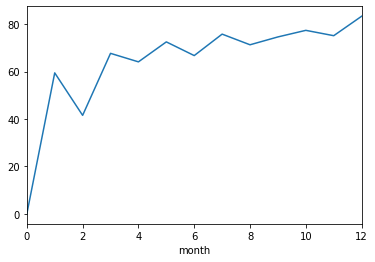

In [37]:
#построен график зависомости количества звонков в каждом месяце для тарифа ultra

total_data_ultra.groupby('month')['calls_amount'].mean().plot()

Из полученнного графика видно, что наименьшее количество звонков клиенты совершают в феврале, далее наблюдается увеличение количества звонков, пик наблюдается в декабре.

In [38]:
total_data_ultra['calls_amount'].describe()

count    986.000000
mean      73.318458
std       43.956739
min        0.000000
25%       41.000000
50%       73.500000
75%      103.750000
max      244.000000
Name: calls_amount, dtype: float64

In [39]:
#рассчитана дисперсия количества зконков в тарифе ultra

variance_ultra = np.var(total_data_ultra['calls_amount'])
print('Дисперсия', variance_ultra)

Дисперсия 1930.2352982320435


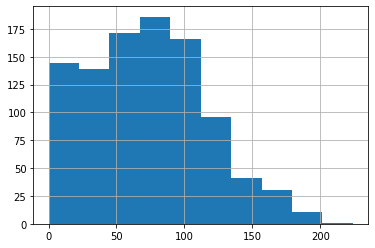

In [40]:
total_data_ultra['calls_amount'].hist(bins=10, range=(0, 224))

In [41]:
total_data_ultra['calls_duration'].describe()

count     986.000000
mean      540.231237
std       326.028527
min         0.000000
25%       291.250000
50%       531.500000
75%       772.500000
max      1727.000000
Name: calls_duration, dtype: float64

In [42]:
variance_ultra_call = np.var(total_data_ultra['calls_duration'])
print('Дисперсия', variance_ultra_call)

Дисперсия 106186.7964278808


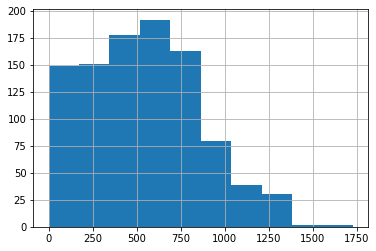

In [43]:
total_data_ultra['calls_duration'].hist(bins=10, range=(0, 1727))

В среднем пользователи тарифа ultra совершают 73 звонка в месяц со средней продолжительностью 540 минут. Это видно и на гистограммах, большая часть пользовалей укладывается в заложенные в тариф 3000 минут в месяц, пик на гистрограмме наблюдается в интервале от 500 -600 минут, то есть основная часть клиентов не переплачивает за дополнительне минуты разговора. Распределение на гистрограмме носит нормальный характер.

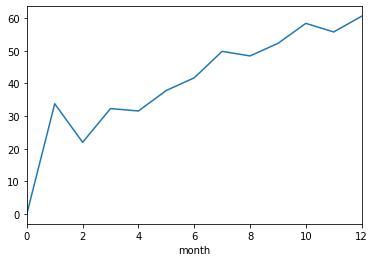

In [44]:
#построен график зависомости количества сообщений в каждом месяце для тарифа ultra

total_data_ultra.groupby('month')['messege_count'].mean().plot()

Из графика также видно, что количества сообщений в течение года растет и пик наблюдается в конце года, основной спад так же, как и созвонками, наблюдается в феврале.

In [45]:
total_data_ultra['messege_count'].describe()

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messege_count, dtype: float64

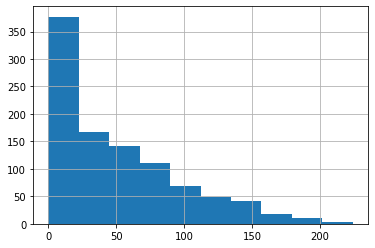

In [46]:
total_data_ultra['messege_count'].hist(bins=10, range=(0, 224))

In [47]:
variance_ultra_m = np.var(total_data_ultra['messege_count'])
print('Дисперсия', variance_ultra_m)

Дисперсия 2283.0995570851965


По гистограмме видно, что в осном клиенты используют от 0 до 25 сообшений в месяц, что также не превышает заложенный тарифом лимит на 1000 сообщений, в связи с чем клиенты так же не переплачивают и за сообщения при использовании данного тарифа.

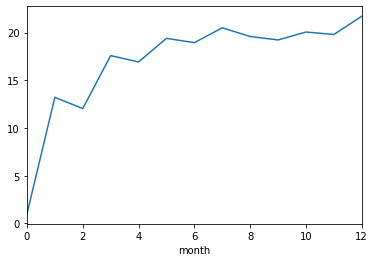

In [48]:
#построен график зависомости количества потраченных Гб в каждом месяце для тарифа ultra

total_data_ultra.groupby('month')['internet_count'].mean().plot()

Также наблюдается спад использования интернета в феврале, с июня месяца приобретает линейный характер.

In [49]:
total_data_ultra['internet_count'].describe()

count    986.000000
mean      19.471602
std        9.838374
min        1.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: internet_count, dtype: float64

Дисперсия 96.6954410427527


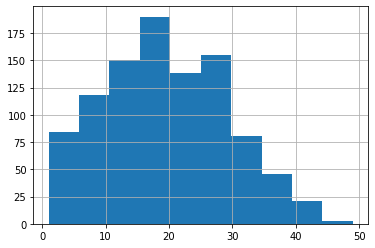

In [50]:
total_data_ultra['internet_count'].hist(bins=10, range=(1, 49))
variance_ultra_g = np.var(total_data_ultra['internet_count'])
print('Дисперсия', variance_ultra_g)

В среднем пользователи тарифа используют 12 Гб трафика интернета в месяц, пик на гистограмме наблюдается в пределах от 15 до 20, но в целом большая часть клиентов не переплачивает за интернет и укладывается в выделенные 15 Гб интернет-трафика.

## Выводы по графикам тарифа ultra

В среднем клиенты тарифа совершают до 73 звонков в месяц, что в среднем составляем 540 минуту в месяц. Также клиенты в среднем отправляют в месяц до 25-ти сообщений и тратят от 12 до 20 Гб интернет-трафика в меясц. Из графиков можно заметить, что к концу года активнсоть в пользовании тарифным планом возрастает. Но в целом тариф выгоден для клиента, можно предположить, что переплаты для клиентов будут не частым случаем.

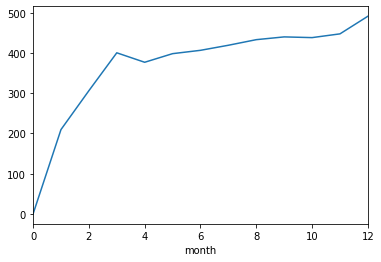

In [51]:
total_data_smart = total_data.query('tariff == "smart"') # получена выборка для тарифа smart

#построен график зависомости количества звонков в каждом месяце для тарифа smart

total_data_smart.groupby('month')['calls_duration'].mean().plot()

С июня месяца наблюдается линейная зависимость в пользовании тарифным планом.

In [52]:
total_data_smart['calls_duration'].describe()

count    2230.000000
mean      429.258296
std       195.039589
min         0.000000
25%       290.250000
50%       434.500000
75%       560.000000
max      1471.000000
Name: calls_duration, dtype: float64

In [53]:
total_data_smart['calls_amount'].describe()

count    2230.000000
mean       58.437220
std        25.963572
min         0.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: calls_amount, dtype: float64

Дисперсия 38023.382610549175


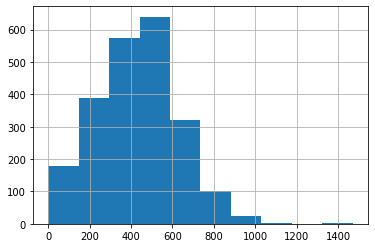

In [54]:
total_data_smart['calls_duration'].hist(bins=10, range=(0, 1471))
variance_smart = np.var(total_data_smart['calls_duration'])
print('Дисперсия', variance_smart)

Дисперсия 38023.382610549175


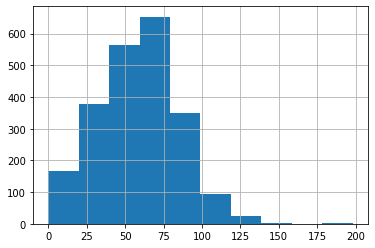

In [55]:
total_data_smart['calls_amount'].hist(bins=10, range=(0, 198))
variance_smart_calls = np.var(total_data_smart['calls_amount'])
print('Дисперсия', variance_smart)

В среднем пользователи тарифа smart совершают 58 звонков в месяц со средей продолжительностью 429 минут в месяц.Основной пик на гистограмме наблюдается в пределах от 400 до 600 минут разговора. То есть можно предположить, что пользователи тарифа smart чаще переплачивают за разговоры, так как лимин минут - 500. Распределение носит нормальный характер.

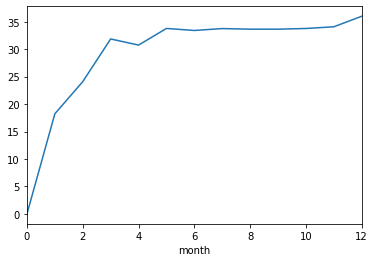

In [56]:
#построен график зависомости количества сообщений в каждом месяце для тарифа smart

total_data_smart.groupby('month')['messege_count'].mean().plot()

Аналогично с июня месяца наблюдается линейная зависимость в пользовании тарифным планом.

In [57]:
total_data_smart['messege_count'].describe()

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messege_count, dtype: float64

Дисперсия 796.5978766916688


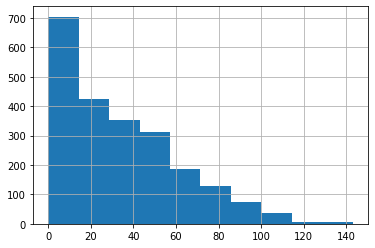

In [58]:
total_data_smart['messege_count'].hist(bins=10, range=(0, 143))
variance_smart_m = np.var(total_data_smart['messege_count'])
print('Дисперсия', variance_smart_m)

В среднем пользователи тарифа используют от 0 до 15 сообщений в месяц - это пик на гистограмме, то есть пользователи редко переплачивают за дополнительный сообщения при использовании этого тарифа.

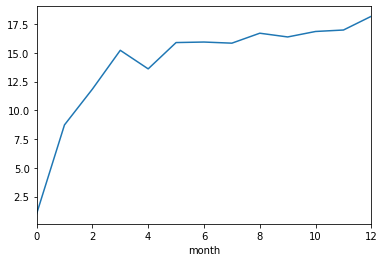

In [59]:
#построен график зависомости количества потраченных Гб в каждом месяце для тарифа smart

total_data_smart.groupby('month')['internet_count'].mean().plot()

In [60]:
total_data_smart['internet_count'].describe()

count    2230.000000
mean       16.302691
std         5.744004
min         1.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: internet_count, dtype: float64

Дисперсия 32.978781998431494


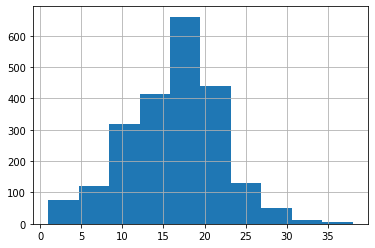

In [61]:
total_data_smart['internet_count'].hist(bins=10, range=(1, 38))
variance_smart_g = np.var(total_data_smart['internet_count'])
print('Дисперсия', variance_smart_g)

Гистограмма носит нормальное распредеделение, видно, что пик лежит в пределах от 18 до 20 Гб, то есть основная часть пользователей переплачивает до дополниетльные ГБ интернета, ввиду того, что лимит составляет 15 Гб.

## Выводы по графикам тарифа smart

В среднем клиенты тарифа smart совершают до 60 звонков в месяц, что в среднем составляем 429 минуту в месяц. Также клиенты в среднем отправляют в месяц до 15 сообщений и тратят 18-20 Гб интернета. Из графиков можно заметить, что к концу года такде активнсоть в пользовании тарифным планом возрастает. По предварительной оценке можно сделать предположение, что тариф smart менее выгоден для клиентов, уже можно заметить необходимость большой переплаты за потраченные Гб интернета, по графику это значение составило 16 Гб (среднее значение выше лимита), а тариф предоставлеят 15 Гб интернет-трафика, в результате чего клиент вынужден переплачивать.


# Вывод по анализу данных
Из сравнения двух гистрогромм тарифов smart и ultra можно сделать вывод, что для клиентов тариф ultra более выгодный, так как при его использовании они сталкиваются с меньшей переплатой за дополнительные услуги звонков, сообщений и интернета, чем при использовании тарифа smart, в этом случае клиенты очень части вынуждены переплачивать сверх заплаченной ежемесячного платежа (это подтверждают и полученные стандартные отклонения, значения стандартного отклонения в тарифе smart выше, чем у ultra, то есть разброс значений больше).

## Проверка гипотез


Проверка гипотез начинается с формулировки нулевой гипотезы H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы. Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. Предположим, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы
- H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Общепринятые пороговые значения — 5% и 1%, поэтому примем, что alpha = 0.05

In [62]:
display(total_data_smart.head())
total_data_smart.info()


,level_0,index,user_id,month,calls_duration,calls_amount,messege_count,internet_count,age,churn_date,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,between_calls,between_messege,between_gb,general_sum
8,8,8,1001,11.0,444.0,59.0,0.0,18.0,41,0,...,15360,500,550,200,3,3,-56.0,-50.0,3.0,1150.0
9,9,9,1001,12.0,430.0,63.0,0.0,14.0,41,0,...,15360,500,550,200,3,3,-70.0,-50.0,-1.0,550.0
10,10,10,1002,6.0,118.0,15.0,4.0,11.0,59,0,...,15360,500,550,200,3,3,-382.0,-46.0,-4.0,550.0
11,11,11,1002,7.0,219.0,26.0,11.0,18.0,59,0,...,15360,500,550,200,3,3,-281.0,-39.0,3.0,1150.0
12,12,12,1002,8.0,294.0,42.0,13.0,20.0,59,0,...,15360,500,550,200,3,3,-206.0,-37.0,5.0,1550.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 8 to 3215
Data columns (total 26 columns):
level_0                  2230 non-null int64
index                    2230 non-null int64
user_id                  2230 non-null int64
month                    2230 non-null float64
calls_duration           2230 non-null float64
calls_amount             2230 non-null float64
messege_count            2230 non-null float64
internet_count           2230 non-null float64
age                      2230 non-null int64
churn_date               2230 non-null object
city                     2230 non-null object
first_name               2230 non-null object
last_name                2230 non-null object
reg_date                 2230 non-null datetime64[ns]
tariff                   2230 non-null object
messages_included        2230 non-null int64
mb_per_month_included    2230 non-null int64
minutes_included         2230 non-null int64
rub_monthly_fee          2230 non-null int64
rub_per_gb    

In [63]:
alpha = 0.05

results = st.ttest_ind(total_data_smart['general_sum'], total_data_ultra['general_sum'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9319267367409655e-152
Отвергаем нулевую гипотезу


То есть гипотеза о том, что  выручка пользователей тарифов «Ультра» и «Смарт» одинаковы неверная, и в дейсвитльности они не равны между собой.

Проверим еще 2гипотезы

H₀ - средняя выручка пользователей из Москвы одинакова с выручкой пользователей из других регионов.
H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
alpha = 0.05

In [64]:
# методом query получен срез данны по пользователям, живущим в Москве

total_data_moscow = total_data.query('city == "Москва"')
# методом query получен срез данны по пользователям, не живущим в Москве

total_data_not_moscow = total_data.query('city != "Москва"')


In [65]:
alpha = 0.05

results_moscow_smart = st.ttest_ind(total_data_moscow['general_sum'], total_data_not_moscow['general_sum'])
print('p-значение:', results_moscow_smart.pvalue)
if results_moscow_smart.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5399163063366629
Не получилось отвергнуть нулевую гипотезу


То есть можно предположить, что выдвинутая гипотеза о том, что средняя выручка пользователей из Москвы одинакова с выручкой пользователей из других регионов верная. Можно сделать предположение о том, что выручка с пользователей, проживающих в Моске и регинов, не зависит от территориального фактора.

## Вывод

В результате работы проведен анализ данных тарифов на небольшой выборке клиентов. В результате работы проведена предобработка данных 5-ти датасетов. Из этого количесва для дальнейшей работы получены одна таблица total_table с информациией по тарифам, а именно включены количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам и помесячная выручка с каждого пользователя. Анализ данных показал, что тариф ultra более выгоден для клиентов, чем тариф smart.То есть большая часть пользователей тарифа ultra укладывается в предложенные оператором условия и не переплачивает за тариф. Тариф smart менее выгоден для клиентов ввиду большой переплаты (предположительно за потраченные Гб в месяц). Также выдвинуто предположение о том, что территориальное использование тарифов не влияет на выручку, и выручки двух разных тарифов не равный между собой.